20.04.2020 Analiza

In [1]:
#System
from datetime import datetime, timedelta

#Data
import pandas as pd
import numpy as np
import pyodbc

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go

In [174]:
today = datetime.now()
first = today.replace(day=1)
lastMonth = first - timedelta(days=1)
print(lastMonth.strftime("%Y-%m"))

2020-03


In [9]:
dates = [x for x in range(1,13)]
dates

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [143]:
df

,coil_num,date,DefectNumber
0,C002177,2019-01-05 20:01:16,724
1,C002178,2019-01-05 20:03:46,799
2,C002179,2019-01-05 20:05:46,1748
3,C002180,2019-01-05 20:08:16,1022
4,C002181,2019-01-05 20:10:15,1903
...,...,...,...
894,D029709,2020-04-10 08:02:44,2442
895,D029710,2020-04-10 08:08:25,1444
896,D029711,2020-04-10 08:14:06,1190
897,D029712,2020-04-10 08:19:36,1364


In [144]:
df['short_date'] = df.date.map(
    lambda x: datetime(
        x.year,
        x.month,
        x.day
    ))

In [145]:
df

,coil_num,date,DefectNumber,short_date
0,C002177,2019-01-05 20:01:16,724,2019-01-05
1,C002178,2019-01-05 20:03:46,799,2019-01-05
2,C002179,2019-01-05 20:05:46,1748,2019-01-05
3,C002180,2019-01-05 20:08:16,1022,2019-01-05
4,C002181,2019-01-05 20:10:15,1903,2019-01-05
...,...,...,...,...
894,D029709,2020-04-10 08:02:44,2442,2020-04-10
895,D029710,2020-04-10 08:08:25,1444,2020-04-10
896,D029711,2020-04-10 08:14:06,1190,2020-04-10
897,D029712,2020-04-10 08:19:36,1364,2020-04-10


In [146]:
df['YearMonth'] = pd.to_datetime(df['short_date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [147]:
df.groupby(df.YearMonth).agg(np.mean)['DefectNumber']

YearMonth
2019-1     1223.444444
2019-12     858.473896
2019-2      866.333333
2019-3     1314.333333
2019-8     1075.195652
2019-9     1768.250000
2020-1     1249.712821
2020-2      883.684729
2020-3     1670.407407
2020-4     2038.367925
Name: DefectNumber, dtype: float64

In [148]:
to_Analyse = df.groupby(df.YearMonth).agg([np.mean,np.median,np.std,np.size])['DefectNumber']
to_Analyse

,mean,median,std,size
YearMonth,,,,
2019-1,1223.444444,1199.0,403.279714,9
2019-12,858.473896,471.0,892.094798,249
2019-2,866.333333,1020.0,626.790502,3
2019-3,1314.333333,1651.0,660.800525,3
2019-8,1075.195652,1071.5,550.229351,46
2019-9,1768.250000,2300.5,1185.828086,4
2020-1,1249.712821,852.0,1050.128475,195
2020-2,883.684729,873.0,679.087768,203
2020-3,1670.407407,1732.0,592.917738,81


In [150]:
to_Analyse = to_Analyse.reset_index()

In [152]:
to_Analyse['NewIndex'] = to_Analyse['YearMonth'].map(
    lambda x: 
    int('{}{}'.format(
        x[2:4], \
        x[x.find('-')+1:] if(len(x[x.find('-')+1:])>1) else '0' + x[x.find('-')+1:]
        )
    )
)

In [153]:
to_Analyse.sort_values(by='NewIndex', ascending=True)

,YearMonth,mean,median,std,size,NewIndex
0,2019-1,1223.444444,1199.0,403.279714,9,1901
2,2019-2,866.333333,1020.0,626.790502,3,1902
3,2019-3,1314.333333,1651.0,660.800525,3,1903
4,2019-8,1075.195652,1071.5,550.229351,46,1908
5,2019-9,1768.250000,2300.5,1185.828086,4,1909
1,2019-12,858.473896,471.0,892.094798,249,1912
6,2020-1,1249.712821,852.0,1050.128475,195,2001
7,2020-2,883.684729,873.0,679.087768,203,2002
8,2020-3,1670.407407,1732.0,592.917738,81,2003
9,2020-4,2038.367925,2097.5,476.460808,106,2004


In [154]:
to_Analyse = to_Analyse.set_index('YearMonth')

In [155]:
def group_and_barplot(df, feat_gropby='YearMonth', feat='DefectNumber', agg = [np.mean, np.median, np.size], sort_by='short_date', subplot=True):
  (
    df
      .groupby(feat_gropby)[feat]
      .agg(agg)
      #.sort_values(by='YearMonth', ascending=False)
      #.head(top)
      .plot(kind='bar', figsize=(15,8), subplots=subplot)
      
);

In [162]:
to_Analyse = to_Analyse.rename(columns={"mean": "Average", "std": "Standard Deviation","size":"Ammount"})

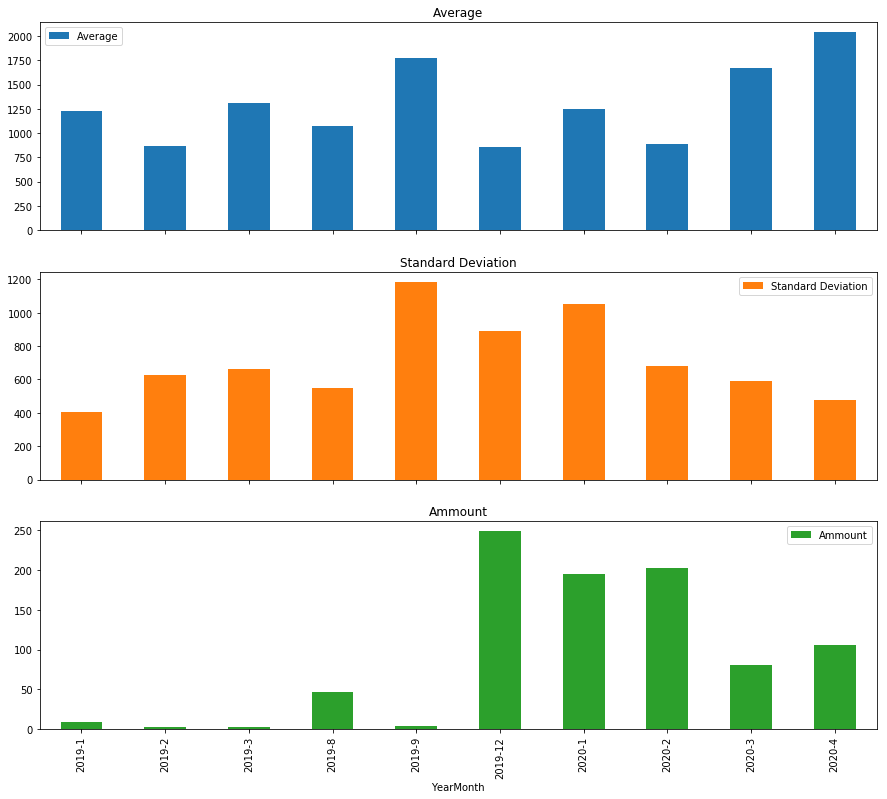

In [163]:
to_Analyse\
    .sort_values(by='NewIndex', ascending=True)\
    [['Average','Standard Deviation','Ammount']]\
    .plot(kind='bar', figsize=(15,13), subplots=True);

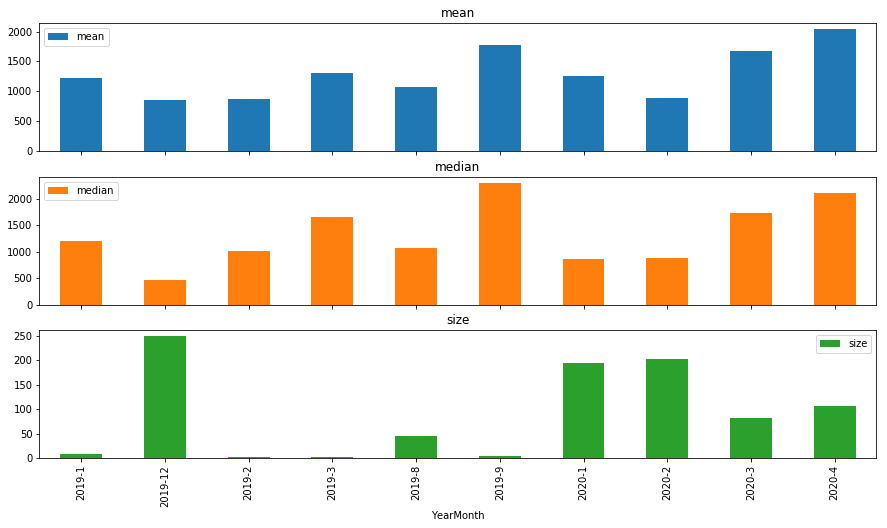

In [158]:
group_and_barplot(df)